<a href="https://colab.research.google.com/github/peterbabulik/QuantumBrainNetwork/blob/main/QantumBrainNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

=== Quantum Brain Network Simulation ===


Processing thoughts: 100%|██████████| 10/10 [00:00<00:00, 105.13it/s]


Thought 1:
Consciousness Level: 0.881
Thought Pattern Peak: 0.023

Thought 2:
Consciousness Level: 0.881
Thought Pattern Peak: 0.000

Thought 3:
Consciousness Level: 0.881
Thought Pattern Peak: 0.307

Thought 4:
Consciousness Level: 0.881
Thought Pattern Peak: 0.000

Thought 5:
Consciousness Level: 0.881
Thought Pattern Peak: 0.000

Thought 6:
Consciousness Level: 0.881
Thought Pattern Peak: 0.081

Thought 7:
Consciousness Level: 0.881
Thought Pattern Peak: 0.140

Thought 8:
Consciousness Level: 0.881
Thought Pattern Peak: 0.054

Thought 9:
Consciousness Level: 0.881
Thought Pattern Peak: 0.000

Thought 10:
Consciousness Level: 0.881
Thought Pattern Peak: 0.000


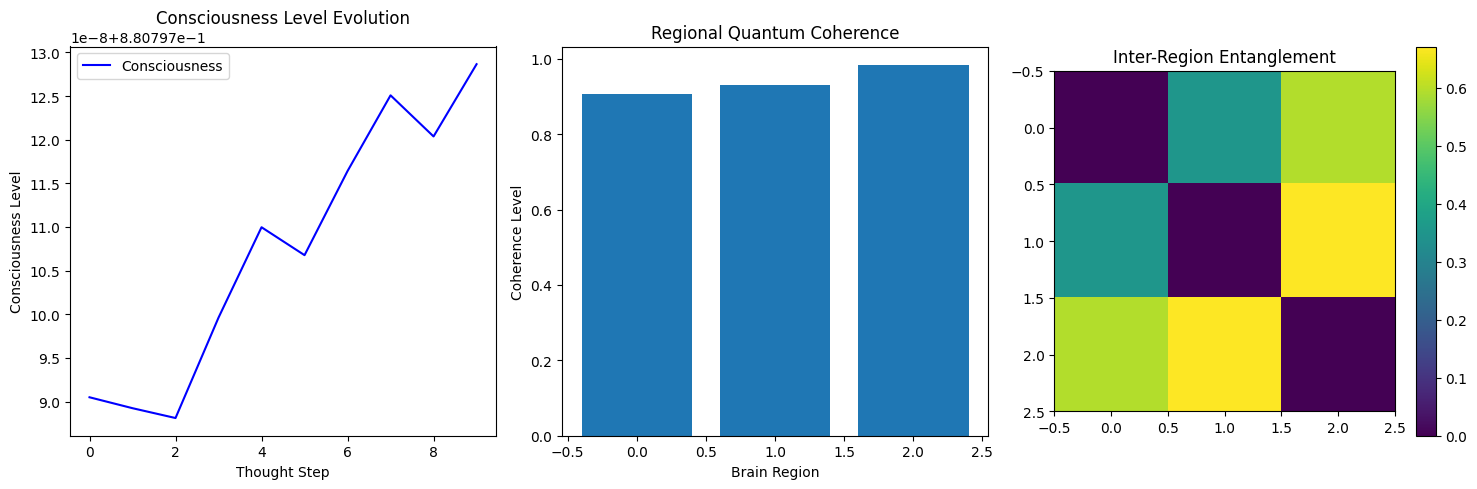

In [5]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple, Optional
from tqdm import tqdm
from dataclasses import dataclass

@dataclass
class SynapticQuantumState:
    """Represents quantum state of a synaptic connection"""
    amplitude: complex
    phase: float
    entanglement_strength: float
    coherence_time: float

class QuantumNeuralRegion:
    """Represents a region of quantum neurons with self-correction"""

    def __init__(self,
                 region_id: int,
                 n_neurons: int,
                 n_synapses_per_neuron: int,
                 base_qubit_id: int,
                 coherence_threshold: float = 0.7,
                 entanglement_strength: float = 0.5):
        self.region_id = region_id
        self.n_neurons = n_neurons
        self.n_synapses = n_synapses_per_neuron
        self.coherence_threshold = coherence_threshold

        # Calculate qubit IDs for this region
        self.base_qubit_id = base_qubit_id

        # Neuron qubits
        self.neuron_qubits = [
            cirq.LineQubit(base_qubit_id + i)
            for i in range(n_neurons)
        ]

        # Synaptic qubits - ensure unique IDs
        synaptic_base = base_qubit_id + n_neurons
        self.synaptic_qubits = [
            [cirq.LineQubit(synaptic_base + i*n_synapses_per_neuron + j)
             for j in range(n_synapses_per_neuron)]
            for i in range(n_neurons)
        ]

        # Initialize synaptic states
        self.synaptic_states = [[SynapticQuantumState(
            amplitude=complex(np.random.normal(0, 0.1), np.random.normal(0, 0.1)),
            phase=np.random.uniform(0, 2*np.pi),
            entanglement_strength=entanglement_strength,
            coherence_time=np.random.uniform(0.8, 1.0)
        ) for _ in range(n_synapses_per_neuron)] for _ in range(n_neurons)]

class QuantumBrainNetwork:
    """Network of interconnected quantum neural regions with self-correction"""

    def __init__(self,
                 n_regions: int,
                 neurons_per_region: int,
                 synapses_per_neuron: int,
                 decoherence_rate: float = 0.01,
                 consciousness_threshold: float = 0.8):

        self.n_regions = n_regions
        self.decoherence_rate = decoherence_rate
        self.consciousness_threshold = consciousness_threshold

        # Calculate total qubits needed per region
        qubits_per_region = (
            neurons_per_region +
            neurons_per_region * synapses_per_neuron
        )

        # Initialize brain regions with unique qubit IDs
        self.regions = [
            QuantumNeuralRegion(
                region_id=i,
                n_neurons=neurons_per_region,
                n_synapses_per_neuron=synapses_per_neuron,
                base_qubit_id=i * qubits_per_region
            ) for i in range(n_regions)
        ]

        # Inter-region quantum connections
        self.region_connections = self._initialize_region_connections()

        # Global quantum state tracking
        self.global_coherence = 1.0
        self.consciousness_level = 0.0
        self.thought_history = []

        self.simulator = cirq.Simulator()

    def _initialize_region_connections(self) -> Dict:
        """Initialize quantum connections between brain regions"""
        connections = {}
        for i in range(self.n_regions):
            for j in range(i + 1, self.n_regions):
                connections[(i, j)] = SynapticQuantumState(
                    amplitude=complex(np.random.normal(0, 0.1), np.random.normal(0, 0.1)),
                    phase=np.random.uniform(0, 2*np.pi),
                    entanglement_strength=np.random.uniform(0.3, 0.7),
                    coherence_time=np.random.uniform(0.8, 1.0)
                )
        return connections

    def create_thought_circuit(self, input_stimulus: np.ndarray) -> cirq.Circuit:
        """Create quantum circuit representing a thought process"""
        circuit = cirq.Circuit()

        # Encode input stimulus into quantum states for each region
        for region_idx, region in enumerate(self.regions):
            # Encode at neuron level
            for neuron_idx, qubit in enumerate(region.neuron_qubits):
                if neuron_idx < len(input_stimulus):
                    # Apply rotation based on input
                    circuit.append(cirq.ry(input_stimulus[neuron_idx])(qubit))
                    # Apply phase based on synaptic state
                    circuit.append(cirq.rz(region.synaptic_states[neuron_idx][0].phase)(qubit))

            # Create entanglement within region
            if len(region.neuron_qubits) > 1:  # Only if we have multiple qubits
                for i in range(region.n_neurons - 1):
                    circuit.append(cirq.CNOT(
                        region.neuron_qubits[i],
                        region.neuron_qubits[i + 1]
                    ))

        # Inter-region entanglement
        for (i, j), connection in self.region_connections.items():
            # Connect regions through entanglement
            if (len(self.regions[i].neuron_qubits) > 0 and
                len(self.regions[j].neuron_qubits) > 0):
                # Use first neuron qubit from each region
                circuit.append(cirq.CNOT(
                    self.regions[i].neuron_qubits[0],
                    self.regions[j].neuron_qubits[0]
                ))
                # Apply connection-specific phase
                circuit.append(cirq.rz(connection.phase)(
                    self.regions[j].neuron_qubits[0]
                ))

        return circuit

    def process_thought(self, input_stimulus: np.ndarray) -> Tuple[np.ndarray, float]:
        """Process input through quantum brain network"""
        # Create and execute thought circuit
        circuit = self.create_thought_circuit(input_stimulus)

        try:
            result = self.simulator.simulate(circuit)

            # Apply quantum error correction
            corrected_state = self._apply_error_correction(result.final_state_vector)

            # Update consciousness level based on quantum coherence
            self._update_consciousness_level(corrected_state)

            # Extract thought pattern
            thought_pattern = self._extract_thought_pattern(corrected_state)

            return thought_pattern, self.consciousness_level

        except Exception as e:
            print(f"Error in thought processing: {str(e)}")
            return np.zeros_like(input_stimulus), 0.0

    def _apply_error_correction(self, state_vector: np.ndarray) -> np.ndarray:
        """Apply error correction across the quantum brain network"""
        corrected_state = state_vector.copy()

        # Apply decoherence effects
        decoherence_mask = np.random.choice(
            [1, 1-self.decoherence_rate],
            size=len(state_vector),
            p=[1-self.decoherence_rate, self.decoherence_rate]
        )
        corrected_state *= decoherence_mask

        # Normalize state
        norm = np.linalg.norm(corrected_state)
        if norm > 0:
            corrected_state /= norm

        return corrected_state

    def _update_consciousness_level(self, quantum_state: np.ndarray):
        """Update consciousness level based on quantum coherence"""
        # Calculate quantum coherence
        coherence = np.abs(np.vdot(quantum_state, quantum_state))

        # Update global coherence with decay
        self.global_coherence = 0.9 * self.global_coherence + 0.1 * coherence

        # Calculate consciousness level
        self.consciousness_level = sigmoid(
            (self.global_coherence - self.consciousness_threshold) * 10
        )

        # Store in thought history
        self.thought_history.append(self.consciousness_level)

    def _extract_thought_pattern(self, quantum_state: np.ndarray) -> np.ndarray:
        """Extract classical thought pattern from quantum state"""
        # Project quantum state to classical representation
        n_classical_dims = sum(region.n_neurons for region in self.regions)
        thought_pattern = np.zeros(n_classical_dims)

        # Extract amplitudes for each neuron
        idx = 0
        for region in self.regions:
            for neuron_idx in range(region.n_neurons):
                if idx < len(quantum_state):
                    # Get neuron's contribution to quantum state
                    neuron_amplitude = np.abs(quantum_state[idx])**2
                    thought_pattern[idx] = neuron_amplitude
                idx += 1

        return thought_pattern

    def visualize_brain_activity(self):
        """Visualize quantum brain network activity"""
        plt.figure(figsize=(15, 5))

        # Plot 1: Consciousness Level Over Time
        plt.subplot(1, 3, 1)
        plt.plot(self.thought_history, 'b-', label='Consciousness')
        plt.title('Consciousness Level Evolution')
        plt.xlabel('Thought Step')
        plt.ylabel('Consciousness Level')
        plt.legend()

        # Plot 2: Region Coherence
        plt.subplot(1, 3, 2)
        coherence_values = [np.mean([s.coherence_time for s in region.synaptic_states[0]])
                          for region in self.regions]
        plt.bar(range(self.n_regions), coherence_values)
        plt.title('Regional Quantum Coherence')
        plt.xlabel('Brain Region')
        plt.ylabel('Coherence Level')

        # Plot 3: Inter-Region Entanglement
        plt.subplot(1, 3, 3)
        entanglement_matrix = np.zeros((self.n_regions, self.n_regions))
        for (i, j), conn in self.region_connections.items():
            entanglement_matrix[i, j] = conn.entanglement_strength
            entanglement_matrix[j, i] = conn.entanglement_strength
        plt.imshow(entanglement_matrix, cmap='viridis')
        plt.colorbar()
        plt.title('Inter-Region Entanglement')

        plt.tight_layout()
        plt.show()

def sigmoid(x: float) -> float:
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def run_quantum_brain_demo():
    """Demonstrate quantum brain network"""
    print("=== Quantum Brain Network Simulation ===")

    # Initialize quantum brain with smaller parameters for testing
    brain = QuantumBrainNetwork(
        n_regions=3,
        neurons_per_region=2,
        synapses_per_neuron=1
    )

    # Run thought processes
    n_thoughts = 10
    for i in tqdm(range(n_thoughts), desc="Processing thoughts"):
        # Generate random input stimulus
        stimulus = np.random.uniform(-np.pi, np.pi, size=2)

        # Process thought
        thought_pattern, consciousness = brain.process_thought(stimulus)

        print(f"\nThought {i+1}:")
        print(f"Consciousness Level: {consciousness:.3f}")
        print(f"Thought Pattern Peak: {np.max(thought_pattern):.3f}")

    # Visualize brain activity
    brain.visualize_brain_activity()

if __name__ == "__main__":
    run_quantum_brain_demo()